## Install Dependencies (one time)

In [ ]:
# clone nvidia lab stylegan repo
!git clone https://github.com/NVlabs/stylegan.git

!pip install numpy
!pip install pickle
# Imaging Library
!pip install Pillow 

## Check for GPU (one time)

In [ ]:
# Check for a GPU
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. GPU is required to run stylegan.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

## Setup 

In [1]:
import pickle
import numpy as np
import PIL
import PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('./stylegan')
import dnnlib
import dnnlib.tflib as tflib
dnnlib.tflib.init_tf()

# these are pretrained models provided by nvidia
model_urls = {
    'anime': 'https://drive.google.com/uc?id=1z8N_-xZW9AU45rHYGj1_tDHkIkbnMW-R',
    'bedrooms': 'https://drive.google.com/uc?id=1MOSKeGF0FJcivpBI7s63V9YHloUTORiF',
    'cars': 'https://drive.google.com/uc?id=1MJ6iCfNtMIRicihwRorsM3b7mmtmK9c3',
    'cats': 'https://drive.google.com/uc?id=1MQywl0FNt6lHu8E_EUqnRbviagS7fbiJ',
    'celebs': 'https://drive.google.com/uc?id=1MGqJl28pN4t7SAtSrPdSRJSQJqahkzUf',
    'faces': 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
}

def gen(model_name, seed=np.random.seed()):
    """
    This function download and cache the pretrained model from nvidia, and run the model to generate images
    """
    with dnnlib.util.open_url(model_urls[model_name], cache_dir='cache') as f:
        _G, _D, Gs = pickle.load(f)

    # Generate latent vectors.
    latents = np.random.RandomState(seed).randn(5, *Gs.input_shapes[0][1:])

    # Run the generator to produce a set of images.
    images = Gs.run(latents, None)

    # Convert images to PIL-compatible format.
    images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8) # [-1,1] => [0,255]
    images = images.transpose(0, 2, 3, 1) # NCHW => NHWC
       
    return images

## Generate Images

(5, 512, 512, 3)


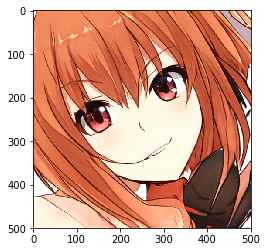

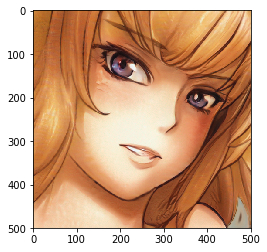

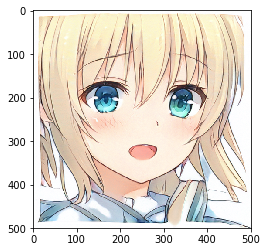

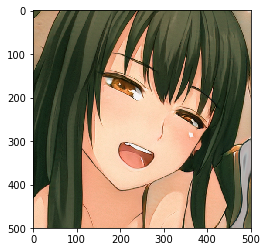

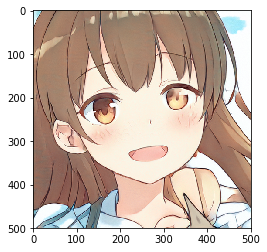

In [8]:
# try one of these: 'anime',  'bedrooms', 'cars', 'cats', 'celebs','faces'
images = gen('anime')

image_dim = 500
for idx in range(images.shape[0]):
    img = PIL.Image.fromarray(images[idx], 'RGB')
    img = img.resize((image_dim, image_dim), PIL.Image.ANTIALIAS)
    plt.figure()
    plt.imshow(img)
    #comment out next line to save the image
    #img.save(f'img{idx}.png')
    


## References:

* [StyleGAN Officil Implementation](https://github.com/NVlabs/stylegan)